EX1 -> Calculating Weights and Bias using Gradient Descent.


---



In [1]:
import numpy as np

def gradient_descent(X, y, learning_rate, num_iters):
  """
  Performs gradient descent to find optimal weights and bias for linear regression.

  Args:
      X: A numpy array of shape (m, n) representing the training data features.
      y: A numpy array of shape (m,) representing the training data target values.
      learning_rate: The learning rate to control the step size during updates.
      num_iters: The number of iterations to perform gradient descent.

  Returns:
      A tuple containing the learned weights and bias.
  """

  # Initialize weights and bias with random values
  m, n = X.shape
  weights = np.random.rand(n)
  bias = 0

  # Loop for the number of iterations
  for i in range(num_iters):
    # Predict y values using current weights and bias
    y_predicted = np.dot(X, weights) + bias

    # Calculate the error
    error = y - y_predicted

    # Calculate gradients for weights and bias
    # MSE IS USED
    weights_gradient = -2/m * np.dot(X.T, error)
    bias_gradient = -2/m * np.sum(error)

    # Update weights and bias using learning rate
    weights -= learning_rate * weights_gradient
    bias -= learning_rate * bias_gradient

  return weights, bias

# Example usage
X = np.array([[1, 1], [2, 2], [3, 3]])
y = np.array([2, 4, 5])
learning_rate = 0.01
num_iters = 100

weights, bias = gradient_descent(X, y, learning_rate, num_iters)

print("Learned weights:", weights)
print("Learned bias:", bias)

Learned weights: [0.85793165 0.75892215]
Learned bias: 0.397825559549904


Real Dataset -> Gradient descent and weight and bias

In [2]:
file="/content/drive/MyDrive/insurance.csv"

In [3]:
import pandas as pd
data = pd.read_csv(file)

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
target_column_name = 'charges'
drop_columns = [target_column_name]
input_feature_train_df = data.drop(columns=drop_columns,axis=1)

In [6]:
input_feature_train_df.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [9]:
print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [10]:
data[num_cols].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


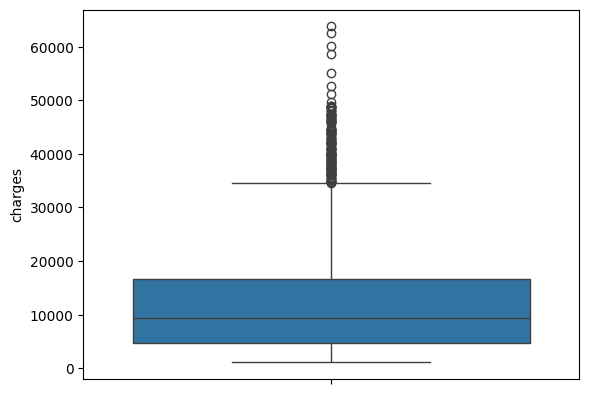

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data['charges'])
plt.show()

In [12]:
data['charges'].mode()

0    1639.5631
Name: charges, dtype: float64

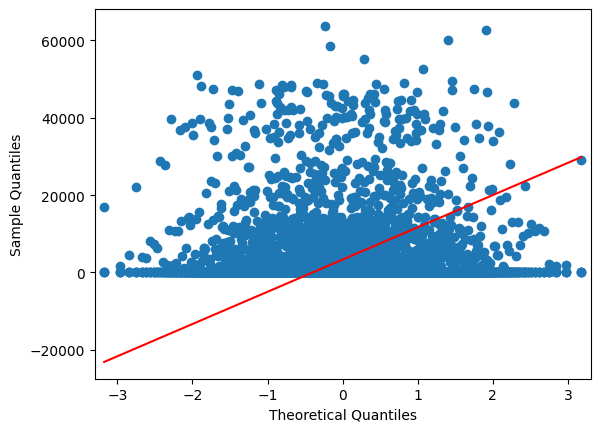

In [13]:
# prompt: qqplot

import statsmodels.api as sns
import matplotlib.pyplot as plt

# Generate a qqplot of the "charges" column
sns.qqplot(data=data[num_cols], line='s')
plt.show()


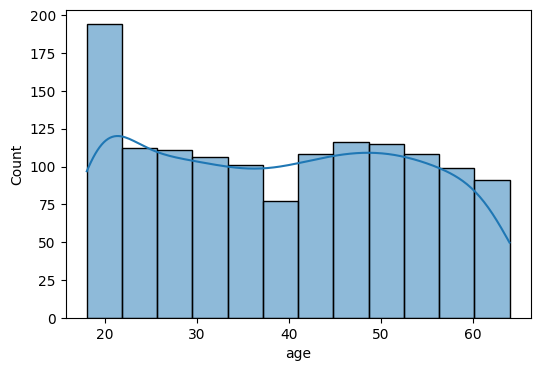

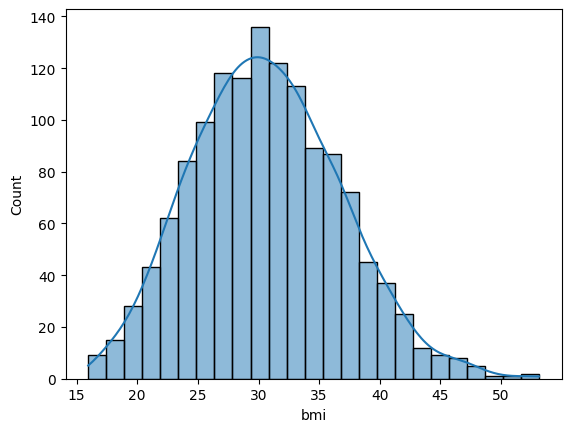

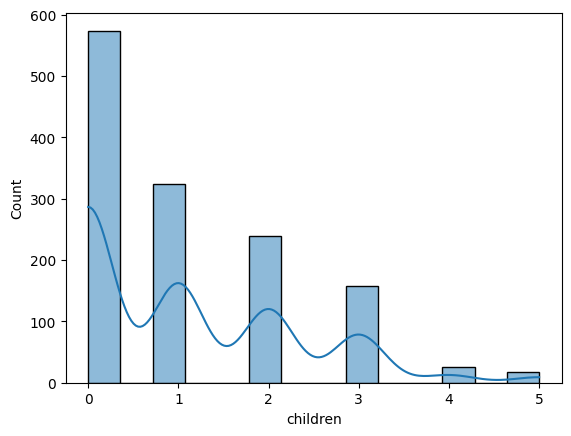

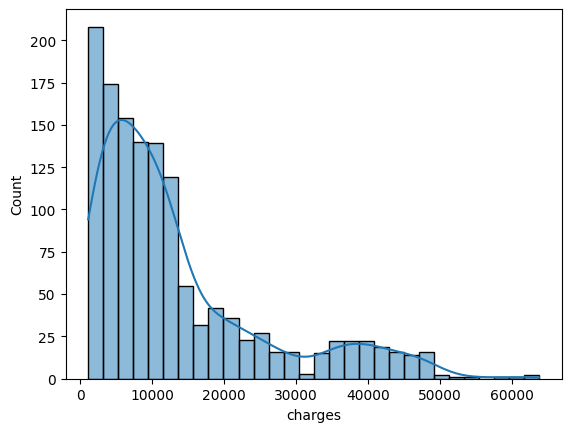

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))


for col in num_cols:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: >

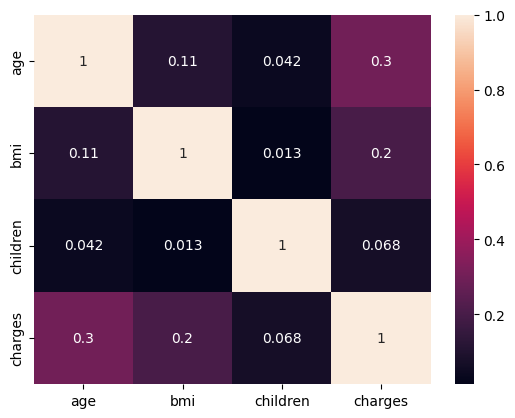

In [16]:
sns.heatmap(data[num_cols].corr(),annot=True)

In [17]:
data[cat_cols].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


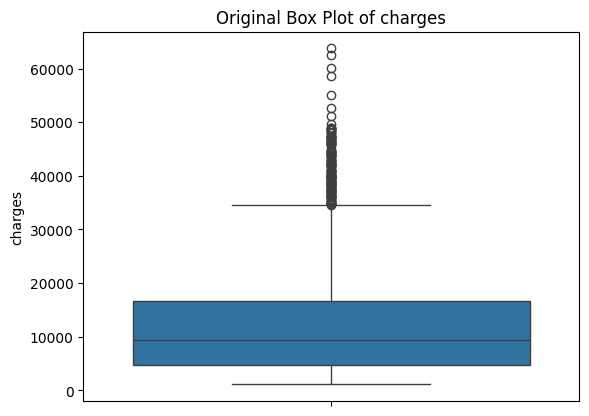

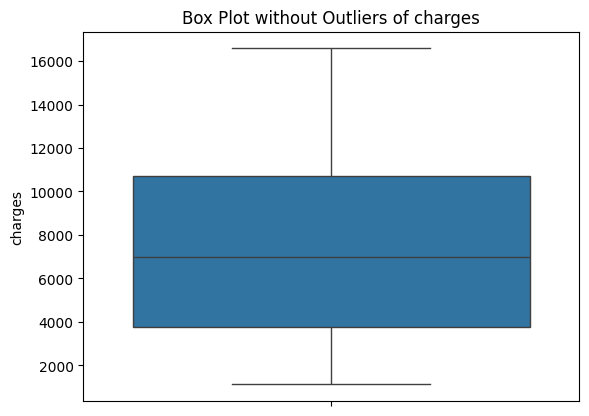

In [18]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] < threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = data['charges'].quantile(0.75)

data = removal_box_plot(data, 'charges', threshold_value)

<Axes: >

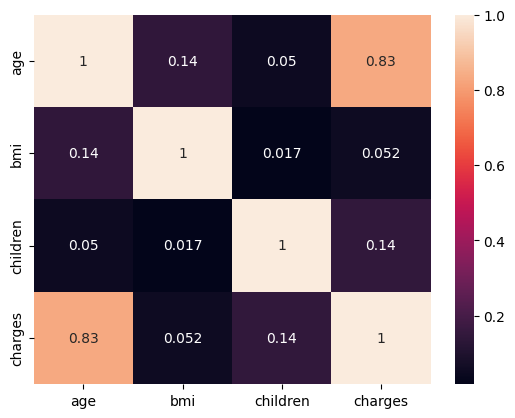

In [19]:
sns.heatmap(data[num_cols].corr(),annot=True)

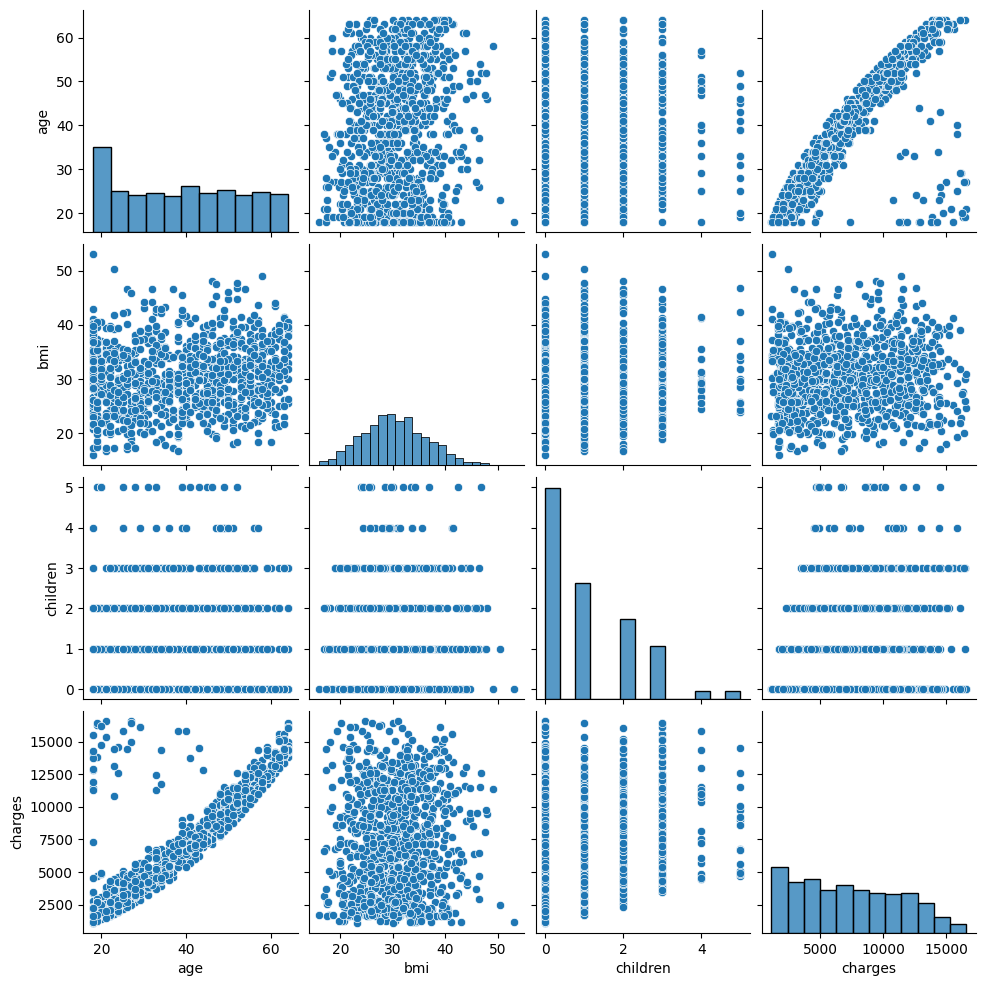

In [20]:
# prompt: pair plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data)
plt.show()


In [21]:
data['region'].unique()

array(['southeast', 'northwest', 'northeast', 'southwest'], dtype=object)

In [22]:
X = data.drop('charges',axis=1)
y = data['charges']
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896


In [24]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder # Onehot Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
num_pipeline=Pipeline(


    steps=[

        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]


)


In [26]:
cat_pipeline=Pipeline(

    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder())
    ]

)

In [27]:
preprocessor=ColumnTransformer(
    [

        ('num_pipeline',num_pipeline,num_cols),
        ('cat_pipeline',cat_pipeline,cat_cols)
    ]
)

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [29]:
preprocessor.fit_transform(X_train)

array([[-0.91905547,  2.62175771, -0.02048977, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07232606,  0.39592524,  1.67172388, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.13452057,  0.35891029, -0.86659659, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.35255174, -0.47269231, -0.86659659, ...,  0.        ,
         1.        ,  0.        ],
       [-1.41474624, -0.01617456, -0.86659659, ...,  1.        ,
         0.        ,  0.        ],
       [-1.27312031,  0.10885372, -0.86659659, ...,  1.        ,
         0.        ,  0.        ]])

In [30]:
preprocessor.transform(X_test)

array([[ 0.4263909 , -0.45459611,  0.82561706, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.0637076 , -0.98514376,  1.67172388, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.2761465 , -1.72626536, -0.02048977, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.49417767,  0.53082418, -0.02048977, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.41777244, -0.67257305, -0.86659659, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28173877, -0.47598253,  1.67172388, ...,  0.        ,
         0.        ,  1.        ]])

In [31]:
preprocessor.get_feature_names_out()

array(['num_pipeline__age', 'num_pipeline__bmi', 'num_pipeline__children',
       'cat_pipeline__sex_female', 'cat_pipeline__sex_male',
       'cat_pipeline__smoker_no', 'cat_pipeline__smoker_yes',
       'cat_pipeline__region_northeast', 'cat_pipeline__region_northwest',
       'cat_pipeline__region_southeast', 'cat_pipeline__region_southwest'],
      dtype=object)

In [32]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [33]:
X_train.head()

,num_pipeline__age,num_pipeline__bmi,num_pipeline__children,cat_pipeline__sex_female,cat_pipeline__sex_male,cat_pipeline__smoker_no,cat_pipeline__smoker_yes,cat_pipeline__region_northeast,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest
0,-0.919055,2.621758,-0.020490,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.072326,0.395925,1.671724,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.134521,0.358910,-0.866597,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.143139,0.264317,-0.020490,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.494178,-0.273634,-0.866597,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [34]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [35]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [38]:
# prompt: install catboost

!pip install catboost


In [39]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor


In [40]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNN':KNeighborsRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'Elasticnet':ElasticNet(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [41]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [42]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
KNeighborsRegressor()
DecisionTreeRegressor()
RandomForestRegressor()
ElasticNet()
AdaBoostRegressor()


In [43]:
X.head()

,age,sex,bmi,children,smoker,region
1,18,male,33.77,1,no,southeast
2,28,male,33.00,3,no,southeast
4,32,male,28.88,0,no,northwest
5,31,female,25.74,0,no,southeast
6,46,female,33.44,1,no,southeast


In [44]:
y.head()

1    1725.5523
2    4449.4620
4    3866.8552
5    3756.6216
6    8240.5896
Name: charges, dtype: float64

In [45]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score
for i in range(len(list(models))):
    model=list(models.values())[i]


    k_folds = KFold(n_splits = 5)
    score_lr=cross_val_score(model,X_train,y_train,cv=k_folds)
    mean_cv_score = np.mean(score_lr)
    std_cv_score = np.std(score_lr)

    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    # Evaluate the model
    mae, rmse, r2_square = evaluate_model(y_test, y_pred)

    # Print model name
    print(model)
    model_list.append(model)

    # Print model training performance
    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score:", r2_square * 100)

    # Print cross-validation performance
    print('Cross-Validation Performance')
    print("Mean R2 score:", mean_cv_score * 100)
    print("Standard Deviation of R2 score:", std_cv_score * 100)



    r2_list.append(r2_square)

    print('='*35)
    print('\n')


LinearRegression()
Model Training Performance
RMSE: 1425.6119762757794
MAE: 679.3711696419996
R2 score: 87.82833026192421
Cross-Validation Performance
Mean R2 score: 88.12205255567015
Standard Deviation of R2 score: 5.630518047095964


Lasso()
Model Training Performance
RMSE: 1426.336580037277
MAE: 680.049930239474
R2 score: 87.81595399232775
Cross-Validation Performance
Mean R2 score: 88.1170469161833
Standard Deviation of R2 score: 5.628743049254694


Ridge()
Model Training Performance
RMSE: 1429.8011445488894
MAE: 682.5789670039476
R2 score: 87.75669213103998
Cross-Validation Performance
Mean R2 score: 88.03585123911336
Standard Deviation of R2 score: 5.685813370069523


KNeighborsRegressor()
Model Training Performance
RMSE: 2205.0329933252046
MAE: 1200.6299880332228
R2 score: 70.88091837858114
Cross-Validation Performance
Mean R2 score: 76.2570327011785
Standard Deviation of R2 score: 9.501115817836443


DecisionTreeRegressor()
Model Training Performance
RMSE: 1784.949656667412
MAE

In [46]:
X_train.head()

,num_pipeline__age,num_pipeline__bmi,num_pipeline__children,cat_pipeline__sex_female,cat_pipeline__sex_male,cat_pipeline__smoker_no,cat_pipeline__smoker_yes,cat_pipeline__region_northeast,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest
0,-0.919055,2.621758,-0.020490,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.072326,0.395925,1.671724,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.134521,0.358910,-0.866597,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.143139,0.264317,-0.020490,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.494178,-0.273634,-0.866597,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
